# Introduction to Neural Networks

In [1]:
import time

from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("Training Images:", X_train.shape)
print("Training Answers:", y_train.shape)
print("Test Images:", X_test.shape)
print("Test Answers:", y_test.shape)

Training Images: (60000, 28, 28)
Training Answers: (60000,)
Test Images: (10000, 28, 28)
Test Answers: (10000,)


## Understanding the Image Data

(28, 28)


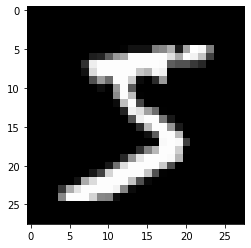

In [4]:
print(X_train[0].shape)
plt.imshow(X_train[0], cmap='gray')

## Preprocessing the image data 

In [5]:
img_height,img_width = 28,28
num_classes = 10
epochs = 3

In [6]:
# Import the training and reshaping the data set to an N x 1 matrix
X_train = X_train.reshape(60000, img_height*img_width) # One layer that is 784 neurons across
X_test = X_test.reshape(10000, img_height*img_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [7]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# Normalizes all pixel values 0 ⇿ 1
X_train /= 255
X_test /= 255
print (X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [9]:
# Output shapes before adding class bins
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [10]:
# Making a bin for each number 0-9 (10 numbers)
y_test =  to_categorical(y_test,10)
y_train = to_categorical(y_train,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

In [11]:
# Creates the nerual network
model = Sequential()

In [12]:
# Connecting the layers
model.add(Dense(512, activation = 'relu', input_shape = (784,))) # Layer 1
model.add(Dense(512, activation = 'relu')) # Layer 2
model.add(Dense(10, activation = 'softmax')) # Output Layer

## Compile the model

In [13]:
# atom is a go-to optimizer
# categorical_crossentropy allows for 10 bin output
# metrics needs to be in accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [15]:
# pixels * nodes + bias = param #
784 * 512 + 512

401920

In [16]:
# input nodes * nodes connected to + 512 paramers = total number of parameters
512 * 512 + 512

262656

In [17]:
# input nodes * nodes + bias
512 * 10 + 10

5130

## Train the model

### Single Threaded Performance

In [18]:
loops = 20
start = time.time()
history = model.fit(X_train, y_train, epochs=loops, validation_data=(X_test,y_test), use_multiprocessing=True)
end = time.time()
print("\nMulti Threaded:", (end-start)/loops, "s/epoch")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 22s 362us/step - loss: 0.1820 - acc: 0.9452 - val_loss: 0.1009 - val_acc: 0.9684
Epoch 2/20
60000/60000 [==============================] - 21s 356us/step - loss: 0.0821 - acc: 0.9743 - val_loss: 0.0830 - val_acc: 0.9772
Epoch 3/20
60000/60000 [==============================] - 21s 354us/step - loss: 0.0538 - acc: 0.9826 - val_loss: 0.1086 - val_acc: 0.9702
Epoch 4/20
60000/60000 [==============================] - 21s 354us/step - loss: 0.0422 - acc: 0.9866 - val_loss: 0.0883 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 21s 354us/step - loss: 0.0319 - acc: 0.9896 - val_loss: 0.0843 - val_acc: 0.9790
Epoch 6/20
60000/60000 [==============================] - 21s 353us/step - loss: 0.0302 - acc: 0.9904 - val_loss: 0.0833 - val_acc: 0.9801
Epoch 7/20
60000/6000

## What is the accuracy of the model?

### Plot the accuracy of the training model

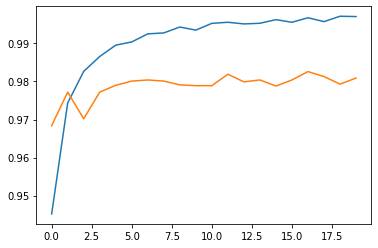

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

### Plot the accuracy of training and validation set

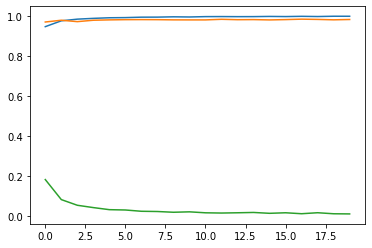

In [20]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])

### Accuracy of training and validation with loss

In [21]:
score = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 35us/step


## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [22]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential # Linear stack of NN layers
from keras.datasets import mnist # Number data set
from keras.utils import to_categorical # Allows reshaping of matricies

## Load the data

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [25]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128
num_classes = 10
epochs = 3

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [27]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_5 (Dense)              (None, 10)              

In [28]:
history_cnn = cnn.fit(X_train,y_train,epochs=loops,verbose=1,validation_data=(X_train,y_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 37s 622us/step - loss: 0.1460 - acc: 0.9558 - val_loss: 0.0471 - val_acc: 0.9857
Epoch 2/20
60000/60000 [==============================] - 38s 631us/step - loss: 0.0482 - acc: 0.9849 - val_loss: 0.0303 - val_acc: 0.9909
Epoch 3/20
60000/60000 [==============================] - 37s 624us/step - loss: 0.0327 - acc: 0.9898 - val_loss: 0.0206 - val_acc: 0.9933
Epoch 4/20
60000/60000 [==============================] - 37s 615us/step - loss: 0.0250 - acc: 0.9916 - val_loss: 0.0166 - val_acc: 0.9946
Epoch 5/20
60000/60000 [==============================] - 37s 616us/step - loss: 0.0190 - acc: 0.9936 - val_loss: 0.0154 - val_acc: 0.9949
Epoch 6/20
60000/60000 [==============================] - 37s 618us/step - loss: 0.0151 - acc: 0.9950 - val_loss: 0.0117 - val_acc: 0.9962
Epoch 7/20
60000/60000 [==============================] - 37s 619us/step - loss: 0.0122 - acc: 0.9964 - val_loss: 0.

Recall that when using neural networks we got good accuracy.

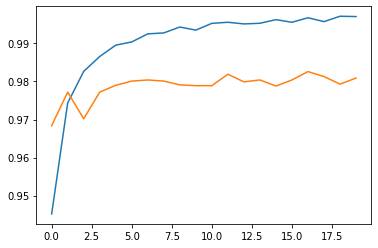

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

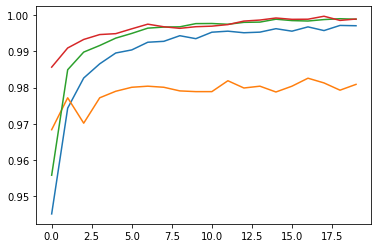

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history_cnn.history['acc'])
plt.plot(history_cnn.history['val_acc'])

## Not related just testing out files

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('data/olympics.csv',skiprows=4)
df.head()

FileNotFoundError: [Errno 2] File b'data/olympics.csv' does not exist: b'data/olympics.csv'